In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [1]:
# 1. 나눔 폰트 설치 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,683 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [37]:
# 2. matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# kmeans

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [6]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## 1.노원구

In [26]:
노원_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 노원구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 노원_df['동']

노원_df =  노원_df.iloc[:,1:]
노원_df

,인구 수,생활보호대상자 비율
0,0.239958,0.202333
1,0.439263,0.868683
2,0.578952,0.419148
3,0.910423,0.437892
4,1.000000,0.077524
5,0.454661,0.763955
6,0.224031,0.330750
7,0.321660,0.052144
8,0.436667,0.106413
9,0.137314,0.651127


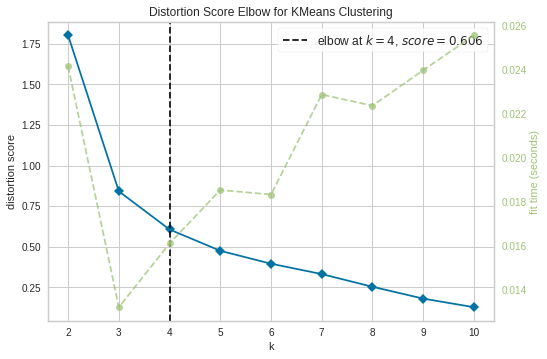

In [27]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(노원_df)
Elbow_M.show()

plt.show()

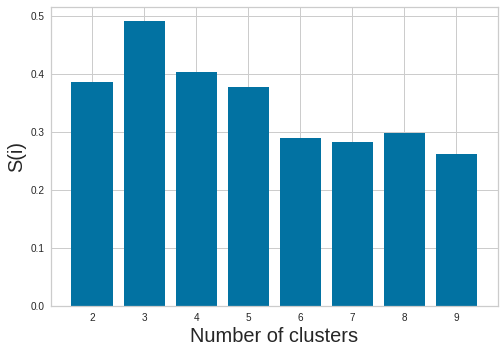

In [28]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(노원_df)
    silhouette_scores.append(silhouette_score(노원_df, m1.fit_predict(노원_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [29]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [30]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(노원_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
노원_df['cluster'] = model.fit_predict(노원_df)

In [31]:
노원_df['cluster'].value_counts()

0    9
2    5
1    5
Name: cluster, dtype: int64

In [32]:
model.cluster_centers_

array([[0.22942301, 0.17213812],
       [0.82858903, 0.26563135],
       [0.44829953, 0.78776607]])

### 1-1. 군집화

In [33]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 노원_df['인구 수']
cluster_df['생활보호대상자 비율'] = 노원_df['생활보호대상자 비율']
cluster_df['cluster'] = 노원_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,월계1동,0.239958,0.202333,0
1,월계2동,0.439263,0.868683,2
2,월계3동,0.578952,0.419148,1
3,공릉1동,0.910423,0.437892,1
4,공릉2동,1.000000,0.077524,1
5,하계1동,0.454661,0.763955,2
6,하계2동,0.224031,0.330750,0
7,중계본동,0.321660,0.052144,0
8,중계1동,0.436667,0.106413,0
9,중계4동,0.137314,0.651127,2


In [34]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,월계1동,0.239958,0.202333,0
1,월계2동,0.439263,0.868683,2
2,월계3동,0.578952,0.419148,1
3,공릉1동,0.910423,0.437892,1
4,공릉2동,1.000000,0.077524,1
5,하계1동,0.454661,0.763955,2
6,하계2동,0.224031,0.330750,0
7,중계본동,0.321660,0.052144,0
8,중계1동,0.436667,0.106413,0
9,중계4동,0.137314,0.651127,2


In [35]:
for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['월계1동', '하계2동', '중계본동', '중계1동', '상계2동', '상계5동', '상계8동', '상계9동', '상계10동']
cluster 1 :  ['월계3동', '공릉1동', '공릉2동', '상계1동', '상계6.7동']
cluster 2 :  ['월계2동', '하계1동', '중계4동', '중계2.3동', '상계3.4동']


### 1-2. 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

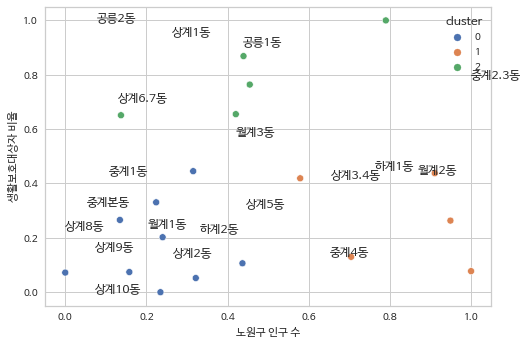

In [38]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))

plt.xlabel('노원구 인구 수')
plt.ylabel('생활보호대상자 비율')